In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler 
from sklearn.preprocessing import RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from sklearn import preprocessing

In [2]:
#Loading in the dataset
ai_df = pd.read_csv("ai4i2020.csv")
ai_df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [3]:
#dropping uneccesary columns
ai_df = ai_df[['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Machine failure']]

ai_df = ai_df.drop(['UDI', 'Product ID'], axis = 1)

ai_df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [4]:
#One hot encode the Types

ai_type = pd.get_dummies(ai_df["Type"])

ai_df = ai_df.drop(['Type'], axis = 1)

ai_df = ai_type.join([ai_df])

ai_df

,H,L,M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,0,0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,0,1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,0,1,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,0,1,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,0,1,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,1,0,0,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,0,0,1,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,1,0,0,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [5]:
ai_df['Machine failure'] = ai_df['Machine failure'].replace(1, 2)
ai_df['Machine failure'] = ai_df['Machine failure'].replace(0, 1)

## Logistic Regression

#### Trial 1

In [6]:
#Defining X and Y
X_ai = ai_df.iloc[:, 0:13]
Y_ai = ai_df.loc[:, "Machine failure"]
X_train, X_test, Y_train, Y_test = train_test_split( X_ai, Y_ai, train_size=5000, shuffle=True, random_state = 1)

In [7]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model = clf.fit(X_train, Y_train)

Wall time: 1min 5s


In [8]:
best_model.cv_results_

{'mean_fit_time': array([0.0089756 , 0.03183799, 0.01496058, 0.04767623, 0.0805778 ,
        0.09354992, 0.23207335, 0.23108754, 0.4862586 , 0.5325984 ,
        1.18172264, 0.87353368, 1.43490176, 1.07902436, 1.50547862,
        1.09546833, 1.48793364, 1.15216074, 0.02154245, 0.01466203,
        0.01675539, 0.02264066, 0.03740144, 0.01685629, 0.02124481,
        0.03620477, 0.05136385, 0.02523408, 1.08693266]),
 'std_fit_time': array([0.00403892, 0.00599661, 0.00584981, 0.01136574, 0.02514536,
        0.01787873, 0.04197101, 0.05459538, 0.09551732, 0.21076968,
        0.09931931, 0.12319989, 0.24637934, 0.16114992, 0.23338611,
        0.14831121, 0.27365591, 0.1569334 , 0.00448687, 0.00262877,
        0.00182816, 0.00553237, 0.03806126, 0.00210399, 0.00327425,
        0.00935262, 0.02957149, 0.00274386, 0.14725789]),
 'mean_score_time': array([0.00337834, 0.00458751, 0.00498624, 0.00339727, 0.00398917,
        0.00538559, 0.00350108, 0.00479212, 0.00378423, 0.00538602,
        0.003590

In [9]:
best_model.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [10]:
best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [11]:
best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [12]:
best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0338
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0338
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0338
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0316
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0010
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0010
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0010
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0010
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0010
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0010


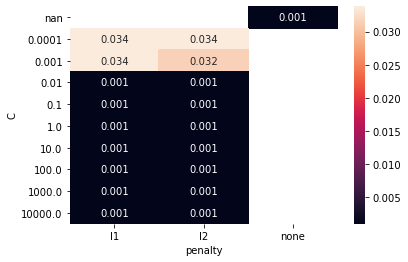

In [13]:
results = pd.DataFrame( best_model.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results['score_acc'] = 1 - best_model.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols = results.columns.to_series().str.split('__').apply(lambda x: x[-1])
results.columns = cols

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results

In [220]:
#assigning result
acc_1 = ("c = 0.01, penalty = l1, solver = saga, acc = 0.0010")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.033800
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.033800
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.033800
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.031666
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.001033
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.001033
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.001033
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.001033
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.001033
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.001033


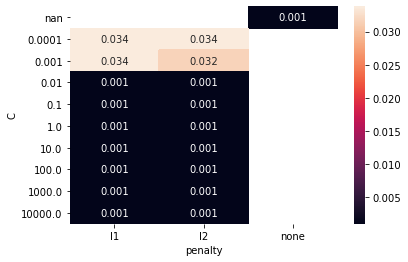

In [15]:
results = pd.DataFrame( best_model.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results['score_precision'] = 1 - best_model.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols = results.columns.to_series().str.split('__').apply(lambda x: x[-1])
results.columns = cols

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results

In [222]:
#assigning result
precision_1 = ("c = 0.01, penalty = l1, solver = saga, precision = 0.001033")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0338
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0338
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0338
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0316
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0010
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0010
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0010
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0010
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0010
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0010


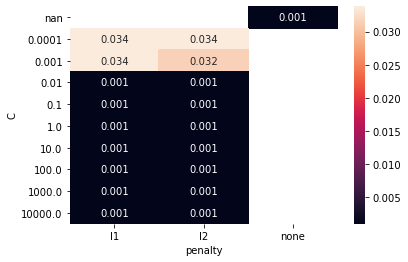

In [17]:
results = pd.DataFrame( best_model.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results['score_f1_micro'] = 1 - best_model.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols = results.columns.to_series().str.split('__').apply(lambda x: x[-1])
results.columns = cols

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results

In [221]:
#assigning result
f1micro_1 = ("c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0010")

#### Trial 2

In [19]:
#Defining X and Y
X_ai = ai_df.iloc[:, 0:13]
Y_ai = ai_df.loc[:, "Machine failure"]
X_train, X_test, Y_train, Y_test = train_test_split( X_ai, Y_ai, train_size=5000, shuffle=True, random_state = 2)

In [20]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model2 = clf.fit(X_train, Y_train)

Wall time: 50.2 s


In [21]:
best_model2.cv_results_

{'mean_fit_time': array([0.00648422, 0.01934667, 0.00718079, 0.02427735, 0.03929482,
        0.05501676, 0.12092857, 0.12031908, 0.40933032, 0.30940762,
        0.97561703, 0.63146834, 1.13146167, 0.81673551, 1.10484724,
        0.88660088, 1.27600441, 0.90653052, 0.01176829, 0.01376328,
        0.0137629 , 0.01336408, 0.01517639, 0.01838131, 0.02088828,
        0.0477674 , 0.02119956, 0.02961001, 0.86599278]),
 'std_fit_time': array([6.33355128e-04, 4.89439127e-04, 9.77603194e-04, 3.33153476e-03,
        4.11735506e-03, 7.69775165e-03, 1.39185026e-02, 1.35348183e-02,
        1.91761129e-01, 6.65295159e-02, 4.97123563e-01, 2.73188292e-01,
        3.14078562e-01, 2.76219100e-01, 3.57810663e-01, 3.04013138e-01,
        4.06657914e-01, 3.24518621e-01, 1.16310465e-03, 5.65556887e-03,
        1.59546139e-03, 1.49261021e-03, 1.46388907e-03, 2.65375342e-03,
        2.15778540e-03, 2.07449864e-02, 3.47605770e-03, 6.20238882e-03,
        2.79722398e-01]),
 'mean_score_time': array([0.00319157, 

In [22]:
best_model2.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [23]:
best_model2.cv_results_['params'][ np.argmin(best_model2.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [24]:
best_model2.cv_results_['params'][ np.argmin(best_model2.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [25]:
best_model2.cv_results_['params'][ np.argmin(best_model2.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0350
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0350
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0350
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0320
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0012
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0012
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0012
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0012
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0012
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0012


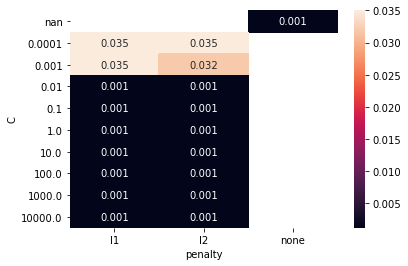

In [26]:
results2 = pd.DataFrame( best_model2.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results2['score_acc'] = 1 - best_model2.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols2 = results2.columns.to_series().str.split('__').apply(lambda x: x[-1])
results2.columns = cols2

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results2.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results2

In [223]:
#assigning result
acc_2 = ("c = 0.01, penalty = l1, solver = saga, acc = 0.0012")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.035000
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.035000
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.035000
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.032096
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.001242
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.001242
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.001242
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.001242
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.001242
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.001242


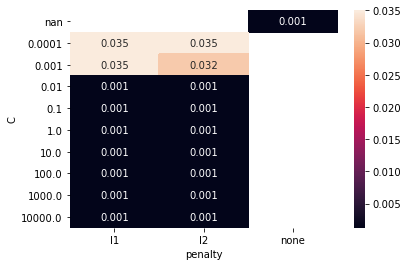

In [28]:
results2 = pd.DataFrame( best_model2.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results2['score_precision'] = 1 - best_model2.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols2 = results2.columns.to_series().str.split('__').apply(lambda x: x[-1])
results2.columns = cols2

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results2.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results2

In [225]:
#assigning result
precision_2 = ("c = 0.01, penalty = l1, solver = saga, precision = 0.001242")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0350
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0350
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0350
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0320
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0012
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0012
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0012
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0012
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0012
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0012


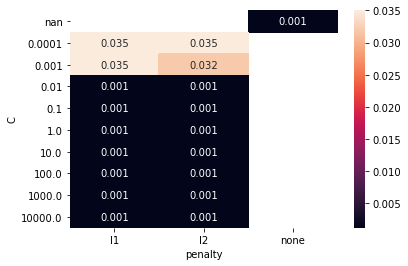

In [30]:
results2 = pd.DataFrame( best_model2.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results2['score_f1_micro'] = 1 - best_model2.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols2 = results2.columns.to_series().str.split('__').apply(lambda x: x[-1])
results2.columns = cols2

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results2.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results2

In [224]:
#assigning result
f1micro_2 = ("c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0012")

#### Trial 3

In [32]:
#Defining X and Y
X_ai = ai_df.iloc[:, 0:13]
Y_ai = ai_df.loc[:, "Machine failure"]
X_train, X_test, Y_train, Y_test = train_test_split( X_ai, Y_ai, train_size=5000, shuffle=True, random_state = 3)

In [33]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision', 'f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model3 = clf.fit(X_train, Y_train)

Wall time: 57 s


In [34]:
best_model3.cv_results_

{'mean_fit_time': array([0.008777  , 0.02543387, 0.0103723 , 0.03899713, 0.04747334,
        0.05884261, 0.11634417, 0.1110353 , 0.27187486, 0.34338961,
        1.12377462, 0.7848011 , 1.35886879, 0.97991109, 1.351373  ,
        1.00227818, 1.30760751, 1.01346812, 0.02772589, 0.01646338,
        0.02364545, 0.01834941, 0.01655927, 0.0182652 , 0.02339416,
        0.06216941, 0.02618575, 0.02457442, 1.04444389]),
 'std_fit_time': array([0.00132333, 0.001263  , 0.00184965, 0.0171177 , 0.00386751,
        0.00441535, 0.00491016, 0.01157113, 0.01913249, 0.02035017,
        0.21605763, 0.08177283, 0.15510105, 0.14471865, 0.09674123,
        0.08365484, 0.11698068, 0.09075693, 0.02221503, 0.00354441,
        0.01203972, 0.00214829, 0.00162585, 0.00244808, 0.00287213,
        0.02574861, 0.00516993, 0.00354991, 0.10471091]),
 'mean_score_time': array([0.00528874, 0.00438843, 0.00438848, 0.00738058, 0.00438762,
        0.00418901, 0.00339108, 0.00358391, 0.00359044, 0.00339198,
        0.003590

In [35]:
best_model3.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [36]:
best_model3.cv_results_['params'][ np.argmin(best_model3.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [37]:
best_model3.cv_results_['params'][ np.argmin(best_model3.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [38]:
best_model3.cv_results_['params'][ np.argmin(best_model3.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0352
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0352
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0352
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0338
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0010
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0010
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0010
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0010
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0010
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0010


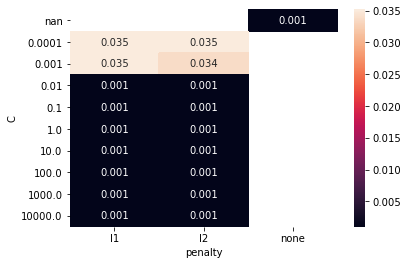

In [39]:
results3 = pd.DataFrame( best_model3.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results3['score_acc'] = 1 - best_model3.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols3 = results3.columns.to_series().str.split('__').apply(lambda x: x[-1])
results3.columns = cols3

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results3.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results3

In [227]:
#assigning result
acc_3 = ("c = 0.01, penalty = l1, solver = saga, acc = 0.0010")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.035200
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.035200
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.035200
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.033846
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.001033
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.001033
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.001033
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.001033
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.001033
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.001033


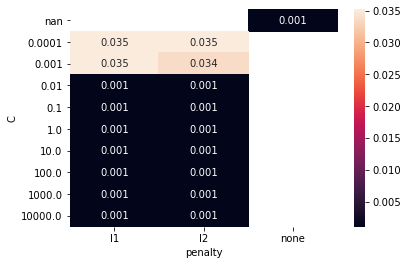

In [41]:
results3 = pd.DataFrame( best_model3.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results3['score_precision'] = 1 - best_model3.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols3 = results3.columns.to_series().str.split('__').apply(lambda x: x[-1])
results3.columns = cols3

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results3.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results3

In [226]:
#assigning result
precision_3 = ("c = 0.01, penalty = l1, solver = saga, precision = 0.001033")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0352
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0352
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0352
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0338
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0010
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0010
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0010
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0010
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0010
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0010


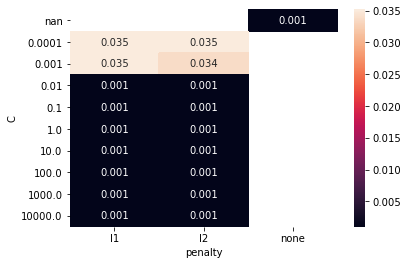

In [43]:
results3 = pd.DataFrame( best_model3.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results3['score_f1_micro'] = 1 - best_model3.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols3 = results3.columns.to_series().str.split('__').apply(lambda x: x[-1])
results3.columns = cols3

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results3.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results3

In [228]:
#assigning result
f1micro_3 = ("c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0010")

#### Trial 4

In [45]:
#Defining X and Y
X_ai = ai_df.iloc[:, 0:13]
Y_ai = ai_df.loc[:, "Machine failure"]
X_train, X_test, Y_train, Y_test = train_test_split( X_ai, Y_ai, train_size=5000, shuffle=True, random_state = 4)

In [46]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision', 'f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model4 = clf.fit(X_train, Y_train)

Wall time: 1min 2s


In [47]:
best_model4.cv_results_

{'mean_fit_time': array([0.00827966, 0.01925011, 0.00877595, 0.02154255, 0.03231359,
        0.04827065, 0.1113009 , 0.09566698, 0.31816378, 0.28351536,
        1.08881998, 0.82155056, 1.66007147, 1.10451865, 1.5767745 ,
        1.12279434, 1.54961209, 1.15879517, 0.0131649 , 0.01376324,
        0.01655569, 0.01436172, 0.01356406, 0.01795201, 0.02253976,
        0.02573133, 0.02972083, 0.02453456, 1.16757202]),
 'std_fit_time': array([0.00132629, 0.0039832 , 0.00159568, 0.00162041, 0.00279239,
        0.0029983 , 0.01157339, 0.00447656, 0.14023288, 0.05226894,
        0.35753099, 0.18669841, 0.41042821, 0.18926561, 0.31862977,
        0.22608225, 0.31586505, 0.18381126, 0.00247532, 0.0029854 ,
        0.00526198, 0.00119663, 0.00101701, 0.00295847, 0.00348933,
        0.00255447, 0.01127281, 0.00184988, 0.23865267]),
 'mean_score_time': array([0.00339108, 0.00359497, 0.00359068, 0.00379   , 0.00378995,
        0.00398932, 0.00379038, 0.00359035, 0.00359778, 0.00358634,
        0.003784

In [48]:
best_model4.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [49]:
best_model4.cv_results_['params'][ np.argmin(best_model4.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [50]:
best_model4.cv_results_['params'][ np.argmin(best_model4.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [51]:
best_model4.cv_results_['params'][ np.argmin(best_model4.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0338
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0338
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0338
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0316
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0008
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0008
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0008
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0008
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0008
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0008


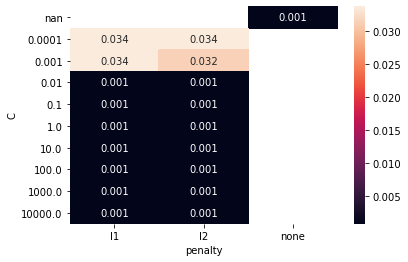

In [52]:
results4 = pd.DataFrame( best_model4.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results4['score_acc'] = 1 - best_model4.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols4 = results4.columns.to_series().str.split('__').apply(lambda x: x[-1])
results4.columns = cols4

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results4.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results4

In [229]:
#assigning result
acc_4 = ("c = 0.01, penalty = l1, solver = saga, acc = 0.0008")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.033800
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.033800
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.033800
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.031669
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.000827
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.000827
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.000827
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.000827
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.000827
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.000827


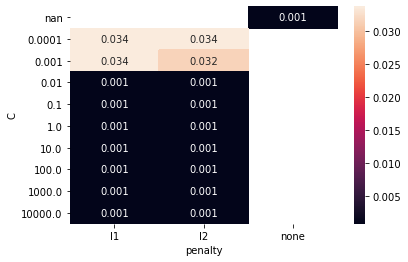

In [54]:
results4 = pd.DataFrame( best_model4.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results4['score_precision'] = 1 - best_model4.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols4 = results4.columns.to_series().str.split('__').apply(lambda x: x[-1])
results4.columns = cols4

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results4.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results4

In [230]:
#assigning result
precision_4 = ("c = 0.01, penalty = l1, solver = saga, acc = 0.000827")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0338
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0338
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0338
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0316
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0008
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0008
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0008
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0008
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0008
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0008


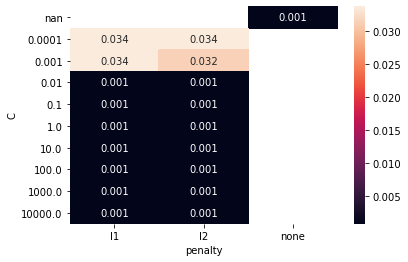

In [56]:
results4 = pd.DataFrame( best_model4.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results4['score_f1_micro'] = 1 - best_model4.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols4 = results4.columns.to_series().str.split('__').apply(lambda x: x[-1])
results4.columns = cols4

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results4.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results4

In [231]:
#assigning result
f1micro_4 = ("c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0008")

#### Trial 5

In [58]:
#Defining X and Y
X_ai = ai_df.iloc[:, 0:13]
Y_ai = ai_df.loc[:, "Machine failure"]
X_train, X_test, Y_train, Y_test = train_test_split( X_ai, Y_ai, train_size=5000, shuffle=True, random_state = 5)

In [59]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision', 'f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model5 = clf.fit(X_train, Y_train)

Wall time: 46.1 s


In [60]:
best_model5.cv_results_

{'mean_fit_time': array([0.01854997, 0.01934829, 0.00698166, 0.02253981, 0.04327927,
        0.05106511, 0.11170616, 0.1003314 , 0.29640236, 0.28783975,
        0.80750842, 0.61125879, 1.03449311, 0.77127476, 1.11825142,
        0.80426917, 1.25533905, 0.79978633, 0.00996771, 0.00977368,
        0.01176829, 0.01615677, 0.01436148, 0.01555843, 0.02014632,
        0.03410892, 0.01978517, 0.02148595, 0.76474395]),
 'std_fit_time': array([0.02463713, 0.00195395, 0.00109241, 0.00231474, 0.01316991,
        0.00593526, 0.02663455, 0.01476048, 0.04782919, 0.0342746 ,
        0.33597199, 0.18354604, 0.36004096, 0.27568503, 0.36813531,
        0.27703356, 0.36315498, 0.29988243, 0.00063984, 0.00074609,
        0.00074609, 0.00305094, 0.00149262, 0.00079796, 0.0009771 ,
        0.01853455, 0.00514801, 0.00089239, 0.22377229]),
 'mean_score_time': array([0.0031918 , 0.00299187, 0.0033906 , 0.0033947 , 0.00359058,
        0.00299001, 0.00379028, 0.00339127, 0.00398936, 0.00339441,
        0.003391

In [61]:
best_model5.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [62]:
best_model5.cv_results_['params'][ np.argmin(best_model5.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [63]:
best_model5.cv_results_['params'][ np.argmin(best_model5.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [64]:
best_model5.cv_results_['params'][ np.argmin(best_model5.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0308
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0308
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0308
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0292
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0012
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0012
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0012
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0012
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0012
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0012


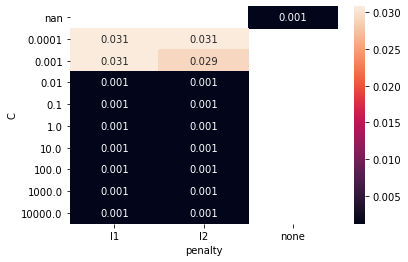

In [65]:
results5 = pd.DataFrame( best_model5.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results5['score_acc'] = 1 - best_model5.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols5 = results5.columns.to_series().str.split('__').apply(lambda x: x[-1])
results5.columns = cols5

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results5.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results5

In [232]:
#assigning result
acc_5 = ("c = 0.01, penalty = l1, solver = saga, acc = 0.0012")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.030800
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.030800
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.030800
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.029246
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.001234
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.001234
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.001234
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.001234
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.001234
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.001234


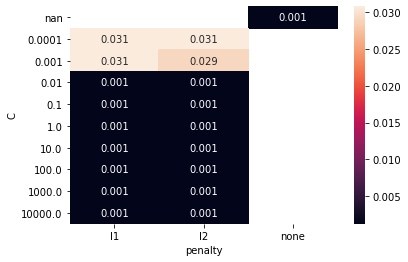

In [67]:
results5 = pd.DataFrame( best_model5.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results5['score_precision'] = 1 - best_model5.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols5 = results5.columns.to_series().str.split('__').apply(lambda x: x[-1])
results5.columns = cols5

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results5.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results5

In [233]:
#assigning result
precision_5 = ("c = 0.01, penalty = l1, solver = saga, precision = 0.001234")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0308
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0308
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0308
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0292
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0012
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0012
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0012
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0012
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0012
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0012


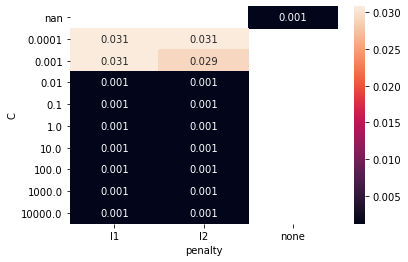

In [69]:
results5 = pd.DataFrame( best_model5.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results5['score_f1_micro'] = 1 - best_model5.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols5 = results5.columns.to_series().str.split('__').apply(lambda x: x[-1])
results5.columns = cols5

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results5.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results5

In [234]:
#assigning result
f1micro_5 = ("c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0012")

#### Trial 6

In [71]:
#Defining X and Y
X_ai = ai_df.iloc[:, 0:13]
Y_ai = ai_df.loc[:, "Machine failure"]
X_train, X_test, Y_train, Y_test = train_test_split( X_ai, Y_ai, train_size=5000, shuffle=True, random_state = 6)

In [72]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision', 'f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model6 = clf.fit(X_train, Y_train)

Wall time: 47.8 s


In [73]:
best_model6.cv_results_

{'mean_fit_time': array([0.00698152, 0.01989388, 0.00698533, 0.02334394, 0.03910666,
        0.05724692, 0.1309629 , 0.10883269, 0.55760508, 0.34509025,
        0.92142296, 0.63954062, 1.03141088, 0.78165159, 1.07490902,
        0.82693591, 1.06448083, 0.80551648, 0.01056628, 0.0086781 ,
        0.01136971, 0.01366472, 0.01356363, 0.02603149, 0.02224202,
        0.02573123, 0.02373624, 0.02174211, 0.81479087]),
 'std_fit_time': array([0.00109249, 0.00210374, 0.00108596, 0.001616  , 0.00487126,
        0.0057324 , 0.02793128, 0.01276603, 0.12311016, 0.09531913,
        0.44000397, 0.23642046, 0.34081087, 0.26807321, 0.33704609,
        0.24926352, 0.3285994 , 0.25292717, 0.00079474, 0.00060025,
        0.00101712, 0.00097685, 0.00135251, 0.01073295, 0.00477793,
        0.00969817, 0.00818534, 0.0023089 , 0.26322368]),
 'mean_score_time': array([0.00378981, 0.00319338, 0.00358629, 0.00357223, 0.00338407,
        0.00398936, 0.00339813, 0.00338297, 0.00338049, 0.00399375,
        0.003201

In [74]:
best_model6.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24, 23,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [75]:
best_model6.cv_results_['params'][ np.argmin(best_model6.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l2',
 'classifier__solver': 'saga'}

In [76]:
best_model6.cv_results_['params'][ np.argmin(best_model6.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l2',
 'classifier__solver': 'saga'}

In [77]:
best_model6.cv_results_['params'][ np.argmin(best_model6.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l2',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0314
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0314
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0314
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0292
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0020
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0010
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0010
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0010
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0010
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0010


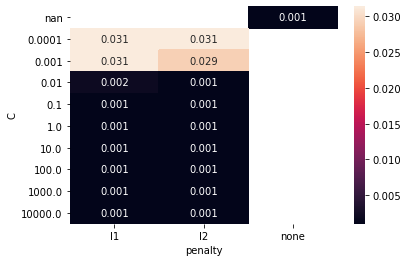

In [78]:
results6 = pd.DataFrame( best_model6.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results6['score_acc'] = 1 - best_model6.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols6 = results6.columns.to_series().str.split('__').apply(lambda x: x[-1])
results6.columns = cols6

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results6.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results6

In [235]:
#assigning result
acc_6 = ("c = 0.01, penalty = l2, solver = saga, acc = 0.0010")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.031400
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.031400
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.031400
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.029263
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.002054
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.001031
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.001031
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.001031
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.001031
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.001031


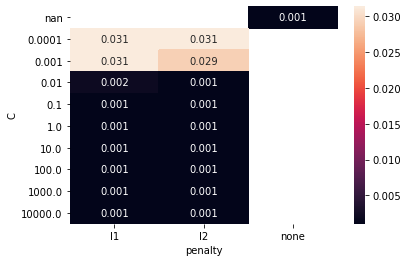

In [80]:
results6 = pd.DataFrame( best_model6.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results6['score_precision'] = 1 - best_model6.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols6 = results6.columns.to_series().str.split('__').apply(lambda x: x[-1])
results6.columns = cols6

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results6.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results6

In [236]:
#assigning result
precision_6 = ("c = 0.01, penalty = l2, solver = saga, precision = 0.001031")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0314
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0314
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0314
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0292
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0020
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0010
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0010
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0010
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0010
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0010


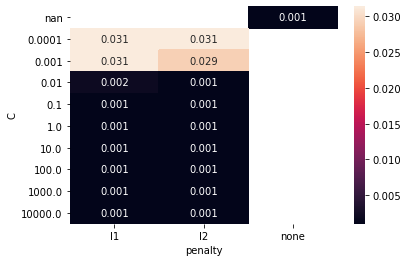

In [82]:
results6 = pd.DataFrame( best_model6.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results6['score_f1_micro'] = 1 - best_model6.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols6 = results6.columns.to_series().str.split('__').apply(lambda x: x[-1])
results6.columns = cols6

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results6.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results6

In [237]:
#assigning result
f1micro_6 = ("c = 0.01, penalty = l2, solver = saga, f1_micro = 0.0010")

#### Trial 7

In [84]:
#Defining X and Y
X_ai = ai_df.iloc[:, 0:13]
Y_ai = ai_df.loc[:, "Machine failure"]
X_train, X_test, Y_train, Y_test = train_test_split( X_ai, Y_ai, train_size=5000, shuffle=True, random_state = 7)

In [85]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model7 = clf.fit(X_train, Y_train)

E:\anaconda_3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\anaconda_3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\anaconda_3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\anaconda_3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\anaconda_3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_i

Wall time: 2min 30s


In [86]:
best_model7.cv_results_

{'mean_fit_time': array([0.00717473, 0.02253995, 0.00877652, 0.02630982, 0.05025768,
        0.06781445, 0.15658016, 0.1567471 , 0.585571  , 0.49957314,
        3.23968954, 1.92382941, 3.82276936, 2.77144384, 3.85161695,
        2.84756947, 3.9365941 , 2.89307747, 0.02313819, 0.00997334,
        0.01236706, 0.01675501, 0.02074423, 0.01875005, 0.02373662,
        0.02493339, 0.04607677, 0.02373681, 2.87717624]),
 'std_fit_time': array([7.47970724e-04, 2.41039627e-03, 7.35895567e-04, 3.97057784e-03,
        1.43642000e-02, 6.03198228e-03, 2.21710498e-02, 2.11127958e-02,
        1.87011877e-01, 6.83189836e-02, 9.58084204e-01, 4.00488736e-01,
        8.65971775e-01, 6.31333025e-01, 8.62982641e-01, 6.31771176e-01,
        7.91666797e-01, 5.80441089e-01, 1.35490026e-02, 6.30826427e-04,
        1.01714916e-03, 1.71580610e-03, 1.25741633e-02, 1.71585606e-03,
        3.95941810e-03, 5.67685963e-03, 1.50117799e-02, 3.53459218e-03,
        5.86800989e-01]),
 'mean_score_time': array([0.00339656, 

In [87]:
best_model7.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 26, 24,  1,  1,  1,  1, 20, 20, 23, 20,  1])

In [88]:
best_model7.cv_results_['params'][ np.argmin(best_model7.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [89]:
best_model7.cv_results_['params'][ np.argmin(best_model7.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [90]:
best_model7.cv_results_['params'][ np.argmin(best_model7.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0328
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0328
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0328
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0312
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0006
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0006
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0006
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0006
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0006
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0006


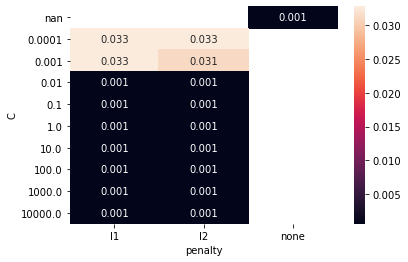

In [91]:
results7 = pd.DataFrame( best_model7.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results7['score_acc'] = 1 - best_model7.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols7 = results7.columns.to_series().str.split('__').apply(lambda x: x[-1])
results7.columns = cols7

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results7.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results7

In [238]:
#assigning result
acc_7 = ("c = 0.01, penalty = l1, solver = saga, acc = 0.0006")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.032800
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.032800
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.032800
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.031250
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.000619
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.000619
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.000619
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.000619
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.000619
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.000619


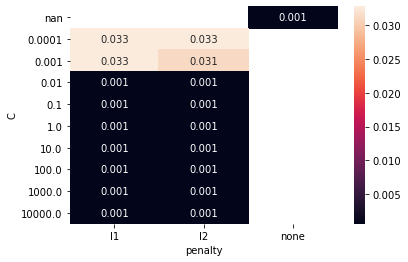

In [93]:
results7 = pd.DataFrame( best_model7.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results7['score_precision'] = 1 - best_model7.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols7 = results7.columns.to_series().str.split('__').apply(lambda x: x[-1])
results7.columns = cols7

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results7.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results7

In [239]:
#assigning result
precision_7 = ("c = 0.01, penalty = l1, solver = saga, precision = 0.000619")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0328
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0328
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0328
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0312
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0006
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0006
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0006
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0006
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0006
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0006


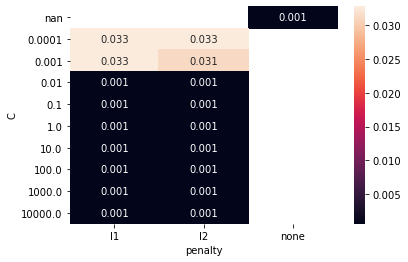

In [95]:
results7 = pd.DataFrame( best_model7.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results7['score_f1_micro'] = 1 - best_model7.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols7 = results7.columns.to_series().str.split('__').apply(lambda x: x[-1])
results7.columns = cols7

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results7.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results7

In [240]:
#assigning result
f1micro_7 = ("c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0006")

#### Trial 8

In [97]:
#Defining X and Y
X_ai = ai_df.iloc[:, 0:13]
Y_ai = ai_df.loc[:, "Machine failure"]
X_train, X_test, Y_train, Y_test = train_test_split( X_ai, Y_ai, train_size=5000, shuffle=True, random_state = 8)

In [98]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model8 = clf.fit(X_train, Y_train)

Wall time: 1min 2s


In [99]:
best_model8.cv_results_

{'mean_fit_time': array([0.00638385, 0.021697  , 0.0093698 , 0.02663031, 0.06692266,
        0.06004624, 0.12660584, 0.10671473, 0.40249863, 0.40930872,
        1.15522027, 0.81169348, 1.49088793, 1.1041841 , 1.53754354,
        1.07919769, 1.48590341, 1.11772704, 0.01256638, 0.0103723 ,
        0.01835418, 0.02273898, 0.01466212, 0.03211393, 0.024436  ,
        0.0243351 , 0.02603164, 0.0226409 , 1.11143656]),
 'std_fit_time': array([0.00079714, 0.00361496, 0.00224069, 0.00686271, 0.02443665,
        0.00715914, 0.02019741, 0.01507502, 0.13558593, 0.12001342,
        0.46498112, 0.235859  , 0.44805285, 0.31262017, 0.29357248,
        0.28660516, 0.3858463 , 0.29150411, 0.00149259, 0.00048899,
        0.00410623, 0.00353458, 0.00107536, 0.01640463, 0.00538803,
        0.00232619, 0.00602174, 0.00159549, 0.28112565]),
 'mean_score_time': array([0.0035006 , 0.0039762 , 0.00380063, 0.00339103, 0.00498681,
        0.0035881 , 0.00339131, 0.00338635, 0.00358596, 0.00418892,
        0.003789

In [100]:
best_model8.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [101]:
best_model8.cv_results_['params'][ np.argmin(best_model8.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [102]:
best_model8.cv_results_['params'][ np.argmin(best_model8.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [103]:
best_model8.cv_results_['params'][ np.argmin(best_model8.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0346
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0346
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0346
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0318
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0012
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0012
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0012
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0012
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0012
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0012


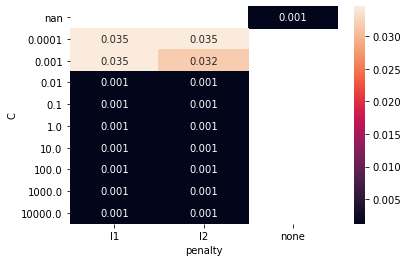

In [104]:
results8 = pd.DataFrame( best_model8.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results8['score_acc'] = 1 - best_model8.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols8 = results8.columns.to_series().str.split('__').apply(lambda x: x[-1])
results8.columns = cols8

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results8.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results8

In [241]:
#assigning result
acc_8 = ("c = 0.01, penalty = l1, solver = saga, acc = 0.0012")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.034600
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.034600
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.034600
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.031888
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.001241
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.001241
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.001241
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.001241
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.001241
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.001241


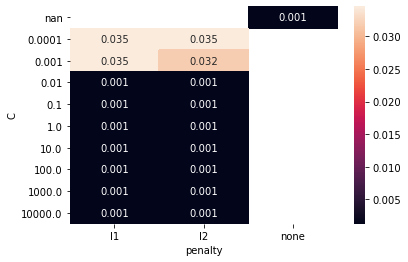

In [106]:
results8 = pd.DataFrame( best_model8.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results8['score_precision'] = 1 - best_model8.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols8 = results8.columns.to_series().str.split('__').apply(lambda x: x[-1])
results8.columns = cols8

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results8.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results8

In [242]:
#assigning result
precision_8 = ("c = 0.01, penalty = l1, solver = saga, precision = 0.001241")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0346
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0346
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0346
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0318
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0012
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0012
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0012
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0012
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0012
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0012


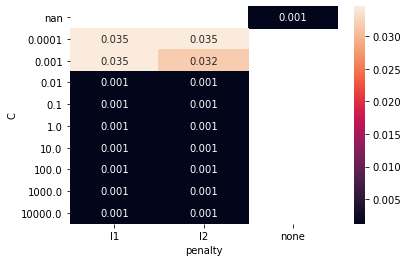

In [108]:
results8 = pd.DataFrame( best_model8.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results8['score_f1_micro'] = 1 - best_model8.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols8 = results8.columns.to_series().str.split('__').apply(lambda x: x[-1])
results8.columns = cols8

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results8.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results8

In [243]:
#assigning result
f1micro_8 = ("c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0012")

#### Trial 9

In [110]:
#Defining X and Y
X_ai = ai_df.iloc[:, 0:13]
Y_ai = ai_df.loc[:, "Machine failure"]
X_train, X_test, Y_train, Y_test = train_test_split( X_ai, Y_ai, train_size=5000, shuffle=True, random_state = 9)

In [111]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model9 = clf.fit(X_train, Y_train)

Wall time: 1min 11s


In [112]:
best_model9.cv_results_

{'mean_fit_time': array([0.00600605, 0.02362924, 0.00708637, 0.03201861, 0.05445299,
        0.07141132, 0.17154784, 0.14704776, 0.48124437, 0.40547061,
        1.34464321, 0.92980714, 1.68832221, 1.23775849, 1.82569423,
        1.25967107, 1.76096277, 1.30848351, 0.01136465, 0.00977378,
        0.01156931, 0.01934829, 0.01356373, 0.01496005, 0.01874995,
        0.02974744, 0.02378383, 0.02488365, 1.26761565]),
 'std_fit_time': array([6.20520533e-04, 2.80693564e-03, 1.54979683e-03, 6.06614684e-03,
        8.30131623e-03, 8.12248875e-03, 2.33387895e-02, 2.27030549e-02,
        9.57608086e-02, 4.45940674e-02, 4.50334118e-01, 1.70340756e-01,
        6.45236515e-01, 4.23603816e-01, 6.14632210e-01, 4.46527960e-01,
        7.12932401e-01, 4.32666476e-01, 1.00967719e-03, 7.46365642e-04,
        4.88752909e-04, 9.86509066e-03, 1.95429107e-03, 8.92123304e-04,
        2.77795777e-03, 9.75211235e-03, 3.95005081e-04, 2.69234267e-03,
        4.68433708e-01]),
 'mean_score_time': array([0.00318789, 

In [113]:
best_model9.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [114]:
best_model9.cv_results_['params'][ np.argmin(best_model9.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [115]:
best_model9.cv_results_['params'][ np.argmin(best_model9.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [116]:
best_model9.cv_results_['params'][ np.argmin(best_model9.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0332
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0332
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0332
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0310
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0008
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0008
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0008
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0008
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0008
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0008


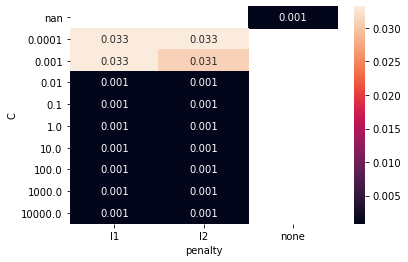

In [117]:
results9 = pd.DataFrame( best_model9.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results9['score_acc'] = 1 - best_model9.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols9 = results9.columns.to_series().str.split('__').apply(lambda x: x[-1])
results9.columns = cols9

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results9.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results9

In [244]:
#assigning result
acc_9 = ("c = 0.01, penalty = l1, solver = saga, acc = 0.0008")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.033200
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.033200
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.033200
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.031066
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.000826
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.000826
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.000826
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.000826
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.000826
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.000826


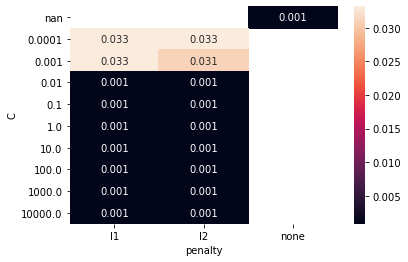

In [119]:
results9 = pd.DataFrame( best_model9.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results9['score_precision'] = 1 - best_model9.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols9 = results9.columns.to_series().str.split('__').apply(lambda x: x[-1])
results9.columns = cols9

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results9.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results9

In [245]:
#assigning result
precision_9 = ("c = 0.01, penalty = l1, solver = saga, precision = 0.000826")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0332
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0332
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0332
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0310
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0008
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0008
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0008
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0008
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0008
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0008


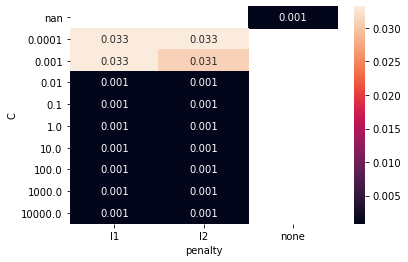

In [121]:
results9 = pd.DataFrame( best_model9.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results9['score_f1_micro'] = 1 - best_model9.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols9 = results9.columns.to_series().str.split('__').apply(lambda x: x[-1])
results9.columns = cols9

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results9.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results9

In [246]:
#assigning result
f1micro_9 = ("c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0008")

#### Trial 10

In [123]:
#Defining X and Y
X_ai = ai_df.iloc[:, 0:13]
Y_ai = ai_df.loc[:, "Machine failure"]
X_train, X_test, Y_train, Y_test = train_test_split( X_ai, Y_ai, train_size=5000, shuffle=True, random_state = 10)

In [124]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model10 = clf.fit(X_train, Y_train)

Wall time: 1min 20s


In [125]:
best_model10.cv_results_

{'mean_fit_time': array([0.00598049, 0.01973605, 0.00857978, 0.0211266 , 0.03729749,
        0.05186567, 0.11748457, 0.12206788, 0.55110841, 0.40783863,
        1.59664984, 1.06473351, 1.89467764, 1.44743299, 2.01322379,
        1.52334399, 1.9649302 , 1.4384542 , 0.01037211, 0.00937519,
        0.01136971, 0.01296549, 0.01476054, 0.01555824, 0.02034554,
        0.02652912, 0.02732673, 0.03231711, 1.52886791]),
 'std_fit_time': array([6.22154422e-04, 2.55566071e-03, 1.01550770e-03, 3.29548707e-03,
        6.45165203e-03, 8.50682528e-03, 1.90316780e-02, 1.92456444e-02,
        1.27229164e-01, 7.71830131e-02, 7.73061088e-01, 3.59185382e-01,
        8.41815900e-01, 6.14506402e-01, 9.09214038e-01, 6.98272292e-01,
        9.16644466e-01, 6.46422669e-01, 1.01685910e-03, 4.88441379e-04,
        1.01707418e-03, 6.30826445e-04, 7.46301923e-04, 1.49254653e-03,
        2.05379882e-03, 2.23889728e-03, 5.73289347e-03, 1.04099930e-02,
        6.79034726e-01]),
 'mean_score_time': array([0.00359907, 

In [126]:
best_model10.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [127]:
best_model10.cv_results_['params'][ np.argmin(best_model10.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [128]:
best_model10.cv_results_['params'][ np.argmin(best_model10.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [129]:
best_model10.cv_results_['params'][ np.argmin(best_model10.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0346
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0346
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0346
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0322
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0008
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0008
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0008
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0008
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0008
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0008


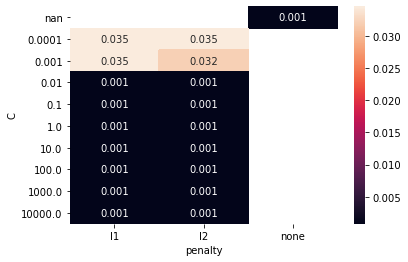

In [130]:
results10 = pd.DataFrame( best_model10.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results10['score_acc'] = 1 - best_model10.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols10 = results10.columns.to_series().str.split('__').apply(lambda x: x[-1])
results10.columns = cols10

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results10.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results10

In [247]:
#assigning result
acc_10 = ("c = 0.01, penalty = l1, solver = saga, acc = 0.0008")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.034600
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.034600
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.034600
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.032276
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.000828
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.000828
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.000828
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.000828
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.000828
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.000828


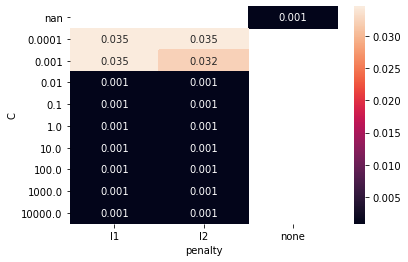

In [132]:
results10 = pd.DataFrame( best_model10.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results10['score_precision'] = 1 - best_model10.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols10 = results10.columns.to_series().str.split('__').apply(lambda x: x[-1])
results10.columns = cols10

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results10.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results10

In [248]:
#assigning result
precision_10 = ("c = 0.01, penalty = l1, solver = saga, precision = 0.000828")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0346
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0346
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0346
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0322
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0008
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0008
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0008
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0008
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0008
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0008


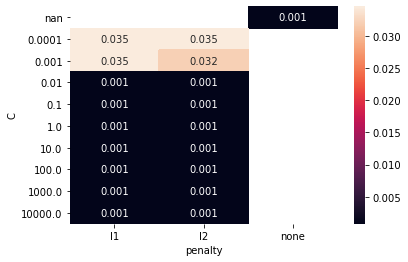

In [134]:
results10 = pd.DataFrame( best_model10.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results10['score_f1_micro'] = 1 - best_model10.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols10 = results10.columns.to_series().str.split('__').apply(lambda x: x[-1])
results10.columns = cols10

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results10.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results10

In [249]:
#assigning result
f1micro_10 = ("c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0008")

#### Trial 11

In [136]:
#Defining X and Y
X_ai = ai_df.iloc[:, 0:13]
Y_ai = ai_df.loc[:, "Machine failure"]
X_train, X_test, Y_train, Y_test = train_test_split( X_ai, Y_ai, train_size=5000, shuffle=True, random_state = 11)

In [137]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model11 = clf.fit(X_train, Y_train)

Wall time: 56.6 s


In [138]:
best_model11.cv_results_

{'mean_fit_time': array([0.00658197, 0.02473354, 0.00897551, 0.02952104, 0.05325713,
        0.06682234, 0.13834138, 0.1284636 , 0.33756323, 0.39088955,
        1.14105268, 0.8312932 , 1.32685757, 0.97296047, 1.32374115,
        1.00294232, 1.29730992, 0.9829277 , 0.01057158, 0.00877657,
        0.01097078, 0.01256642, 0.01276593, 0.01575799, 0.01815147,
        0.02194123, 0.0195478 , 0.02712765, 0.97386179]),
 'std_fit_time': array([0.00079778, 0.00353484, 0.00154499, 0.00439727, 0.01214285,
        0.00935437, 0.0258166 , 0.02045005, 0.07062281, 0.05783147,
        0.20817201, 0.17074311, 0.11292904, 0.08922494, 0.07492078,
        0.07270323, 0.07622962, 0.04907537, 0.00119689, 0.00039907,
        0.00089212, 0.00079786, 0.00097739, 0.00116327, 0.00171555,
        0.00282079, 0.00205386, 0.01291756, 0.05234171]),
 'mean_score_time': array([0.00349264, 0.0035903 , 0.00379038, 0.00319157, 0.00339131,
        0.00359063, 0.0033855 , 0.0033834 , 0.00359039, 0.0039896 ,
        0.003391

In [139]:
best_model11.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [140]:
best_model11.cv_results_['params'][ np.argmin(best_model11.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [141]:
best_model11.cv_results_['params'][ np.argmin(best_model11.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [142]:
best_model11.cv_results_['params'][ np.argmin(best_model11.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0354
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0354
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0354
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0324
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0012
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0012
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0012
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0012
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0012
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0012


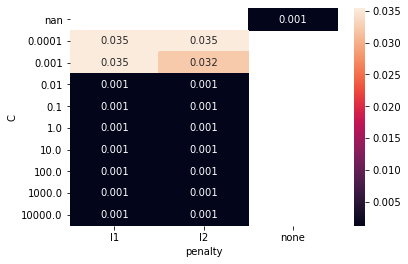

In [143]:
results11 = pd.DataFrame( best_model11.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results11['score_acc'] = 1 - best_model11.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols11 = results11.columns.to_series().str.split('__').apply(lambda x: x[-1])
results11.columns = cols11

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results11.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results11

In [250]:
#assigning result
acc_11 = ("c = 0.01, penalty = l1, solver = saga, acc = 0.0012")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.035400
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.035400
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.035400
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.032495
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.001242
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.001242
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.001242
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.001242
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.001242
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.001242


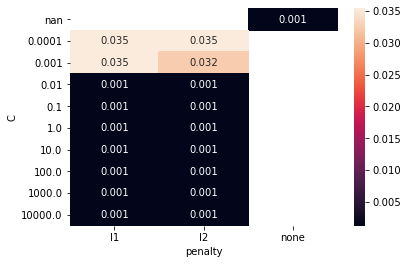

In [145]:
results11 = pd.DataFrame( best_model11.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results11['score_precision'] = 1 - best_model11.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols11 = results11.columns.to_series().str.split('__').apply(lambda x: x[-1])
results11.columns = cols11

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results11.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results11

In [251]:
#assigning result
precision_11 = ("c = 0.01, penalty = l1, solver = saga, precision = 0.001242")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0354
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0354
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0354
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0324
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0012
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0012
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0012
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0012
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0012
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0012


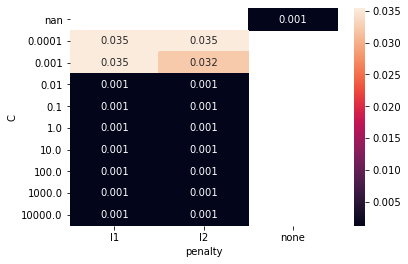

In [147]:
results11 = pd.DataFrame( best_model11.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results11['score_f1_micro'] = 1 - best_model11.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols11 = results11.columns.to_series().str.split('__').apply(lambda x: x[-1])
results11.columns = cols11

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results11.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results11

In [252]:
#assigning result
f1micro_11 = ("c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0012")

#### Trial 12

In [149]:
#Defining X and Y
X_ai = ai_df.iloc[:, 0:13]
Y_ai = ai_df.loc[:, "Machine failure"]
X_train, X_test, Y_train, Y_test = train_test_split( X_ai, Y_ai, train_size=5000, shuffle=True, random_state = 12)

In [150]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model12 = clf.fit(X_train, Y_train)

Wall time: 41.3 s


In [151]:
best_model12.cv_results_

{'mean_fit_time': array([0.00678191, 0.02114353, 0.00777917, 0.02722845, 0.04567761,
        0.0624331 , 0.1254436 , 0.10834246, 0.30948944, 0.27380757,
        0.66849027, 0.51622548, 0.91297021, 0.69593487, 0.99455366,
        0.76399846, 1.0013341 , 0.72460651, 0.0101728 , 0.009477  ,
        0.01057186, 0.0121675 , 0.01236687, 0.01476035, 0.02214108,
        0.02174182, 0.01894951, 0.02134309, 0.72080412]),
 'std_fit_time': array([0.00039845, 0.00116289, 0.00116288, 0.0041544 , 0.00247543,
        0.00529999, 0.00799816, 0.0069922 , 0.06837447, 0.06004869,
        0.14109918, 0.09257504, 0.15228519, 0.11565477, 0.15385642,
        0.08774567, 0.13759251, 0.113548  , 0.00074624, 0.00044588,
        0.00048854, 0.00074634, 0.00079794, 0.00074612, 0.00833006,
        0.00239376, 0.00141077, 0.00101746, 0.10504532]),
 'mean_score_time': array([0.00438833, 0.00319147, 0.00398946, 0.0035902 , 0.00359058,
        0.00319142, 0.00398979, 0.00378308, 0.00329766, 0.00339541,
        0.003390

In [152]:
best_model12.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [153]:
best_model12.cv_results_['params'][ np.argmin(best_model12.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [154]:
best_model12.cv_results_['params'][ np.argmin(best_model12.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [155]:
best_model12.cv_results_['params'][ np.argmin(best_model12.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0358
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0358
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0358
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0340
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0012
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0012
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0012
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0012
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0012
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0012


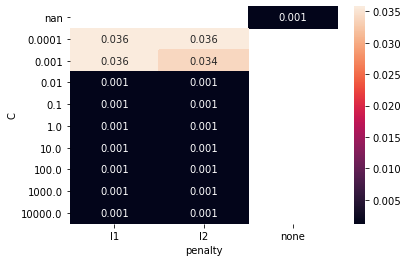

In [156]:
results12 = pd.DataFrame( best_model12.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results12['score_acc'] = 1 - best_model12.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols12 = results12.columns.to_series().str.split('__').apply(lambda x: x[-1])
results12.columns = cols12

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results12.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results12

In [253]:
#assigning result
acc_12 = ("c = 0.01, penalty = l1, solver = saga, acc = 0.0012")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.035800
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.035800
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.035800
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.034060
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.001243
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.001243
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.001243
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.001243
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.001243
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.001243


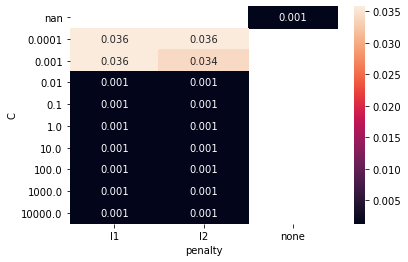

In [158]:
results12 = pd.DataFrame( best_model12.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results12['score_precision'] = 1 - best_model12.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols12 = results12.columns.to_series().str.split('__').apply(lambda x: x[-1])
results12.columns = cols12

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results12.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results12

In [254]:
#assigning result
precision_12 = ("c = 0.01, penalty = l1, solver = saga, precision = 0.001243")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0358
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0358
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0358
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0340
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0012
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0012
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0012
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0012
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0012
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0012


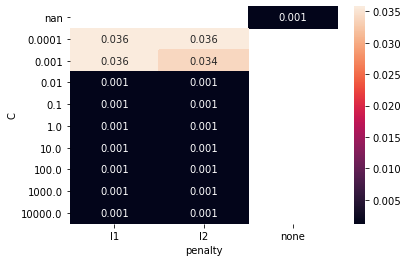

In [160]:
results12 = pd.DataFrame( best_model12.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results12['score_f1_micro'] = 1 - best_model12.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols12 = results12.columns.to_series().str.split('__').apply(lambda x: x[-1])
results12.columns = cols12

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results12.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results12

In [255]:
#assigning result
f1micro_12 = ("c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0012")

#### Trial 13

In [162]:
#Defining X and Y
X_ai = ai_df.iloc[:, 0:13]
Y_ai = ai_df.loc[:, "Machine failure"]
X_train, X_test, Y_train, Y_test = train_test_split( X_ai, Y_ai, train_size=5000, shuffle=True, random_state = 13)

In [163]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model13 = clf.fit(X_train, Y_train)

Wall time: 41.6 s


In [164]:
best_model13.cv_results_

{'mean_fit_time': array([0.00638304, 0.02154255, 0.00897574, 0.02613559, 0.04339046,
        0.05791888, 0.11470165, 0.11081438, 0.36342297, 0.25356965,
        0.71235433, 0.51598721, 0.92279687, 0.67326527, 0.95368347,
        0.70538883, 1.03158665, 0.73836217, 0.01276579, 0.01316462,
        0.01156878, 0.01695447, 0.01675491, 0.01595702, 0.02313795,
        0.03729992, 0.02435098, 0.03038182, 0.72430291]),
 'std_fit_time': array([0.0007983 , 0.00299859, 0.00063068, 0.00385363, 0.00755209,
        0.00840696, 0.02596604, 0.02152147, 0.23723919, 0.08587246,
        0.40731918, 0.22989716, 0.42546572, 0.30575952, 0.39594475,
        0.29237154, 0.44326822, 0.29467615, 0.00182812, 0.00171597,
        0.00162035, 0.00252291, 0.00193416, 0.00166881, 0.00400902,
        0.01488138, 0.00401824, 0.00287775, 0.2931033 ]),
 'mean_score_time': array([0.00279236, 0.00319157, 0.00299225, 0.00498147, 0.00318613,
        0.00359373, 0.00319223, 0.00298634, 0.00318403, 0.00319147,
        0.003584

In [165]:
best_model13.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [166]:
best_model13.cv_results_['params'][ np.argmin(best_model13.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [167]:
best_model13.cv_results_['params'][ np.argmin(best_model13.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [168]:
best_model13.cv_results_['params'][ np.argmin(best_model13.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0336
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0336
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0336
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0318
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0014
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0014
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0014
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0014
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0014
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0014


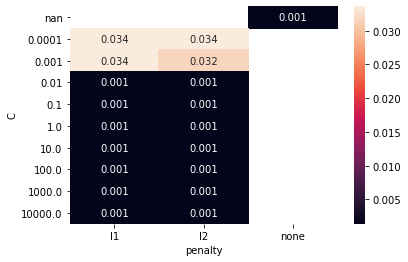

In [169]:
results13 = pd.DataFrame( best_model13.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results13['score_acc'] = 1 - best_model13.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols13 = results13.columns.to_series().str.split('__').apply(lambda x: x[-1])
results13.columns = cols13

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results13.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results13

In [256]:
#assigning result
acc_13 = ("c = 0.01, penalty = l1, solver = saga, acc = 0.0014")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.033600
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.033600
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.033600
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.031854
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.001445
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.001445
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.001445
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.001445
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.001445
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.001445


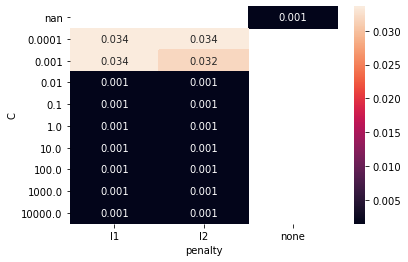

In [171]:
results13 = pd.DataFrame( best_model13.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results13['score_precision'] = 1 - best_model13.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols13 = results13.columns.to_series().str.split('__').apply(lambda x: x[-1])
results13.columns = cols13

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results13.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results13

In [257]:
#assigning result
precision_13 = ("c = 0.01, penalty = l1, solver = saga, precision = 0.001445")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0336
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0336
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0336
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0318
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0014
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0014
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0014
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0014
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0014
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0014


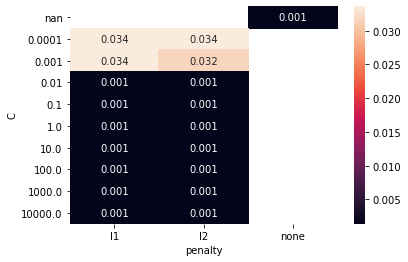

In [173]:
results13 = pd.DataFrame( best_model13.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results13['score_f1_micro'] = 1 - best_model13.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols13 = results13.columns.to_series().str.split('__').apply(lambda x: x[-1])
results13.columns = cols13

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results13.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results13

In [258]:
#assigning result
f1micro_13 = ("c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0014")

#### Trial 14

In [175]:
#Defining X and Y
X_ai = ai_df.iloc[:, 0:13]
Y_ai = ai_df.loc[:, "Machine failure"]
X_train, X_test, Y_train, Y_test = train_test_split( X_ai, Y_ai, train_size=5000, shuffle=True, random_state = 14)

In [176]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model14 = clf.fit(X_train, Y_train)

Wall time: 1min 22s


In [177]:
best_model14.cv_results_

{'mean_fit_time': array([0.00779691, 0.02214651, 0.00738726, 0.02513251, 0.0468133 ,
        0.05984378, 0.14960318, 0.1348794 , 0.57935929, 0.43450718,
        1.57971439, 1.08876576, 2.00557718, 1.4080111 , 2.03736286,
        1.50276341, 2.03843184, 1.54263177, 0.01136942, 0.00977349,
        0.01067529, 0.01316462, 0.01356349, 0.01775255, 0.02175474,
        0.02728   , 0.04028378, 0.03008437, 1.52454424]),
 'std_fit_time': array([7.59915268e-04, 1.46095884e-03, 1.35090041e-03, 3.17923207e-03,
        9.22495887e-03, 1.04728713e-02, 2.19739868e-02, 1.75656366e-02,
        1.05157146e-01, 6.58905028e-02, 2.85299809e-01, 2.09460010e-01,
        5.96115751e-01, 4.03007545e-01, 5.78009750e-01, 4.06258436e-01,
        5.45737487e-01, 3.96755742e-01, 4.88947725e-04, 7.46607847e-04,
        5.90252922e-04, 7.46263705e-04, 1.01692454e-03, 1.71575066e-03,
        1.60838647e-03, 3.28067694e-03, 1.15498992e-02, 2.19675274e-03,
        4.24259937e-01]),
 'mean_score_time': array([0.00438709, 

In [178]:
best_model14.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [179]:
best_model14.cv_results_['params'][ np.argmin(best_model14.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [180]:
best_model14.cv_results_['params'][ np.argmin(best_model14.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [181]:
best_model14.cv_results_['params'][ np.argmin(best_model14.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0360
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0360
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0360
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0336
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0004
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0004
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0004
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0004
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0004
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0004


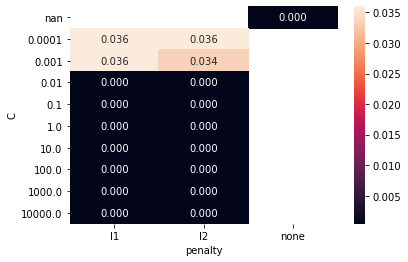

In [182]:
results14 = pd.DataFrame( best_model14.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results14['score_acc'] = 1 - best_model14.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols14 = results14.columns.to_series().str.split('__').apply(lambda x: x[-1])
results14.columns = cols14

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results14.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results14

In [259]:
#assigning result
acc_14 = ("c = 0.01, penalty = l1, solver = saga, acc = 0.0004")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.036000
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.036000
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.036000
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.033681
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.000415
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.000415
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.000415
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.000415
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.000415
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.000415


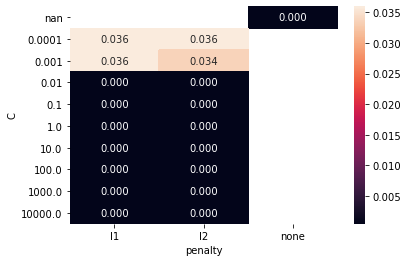

In [184]:
results14 = pd.DataFrame( best_model14.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results14['score_precision'] = 1 - best_model14.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols14 = results14.columns.to_series().str.split('__').apply(lambda x: x[-1])
results14.columns = cols14

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results14.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results14

In [260]:
#assigning result
precision_14 = ("c = 0.01, penalty = l1, solver = saga, precision = 0.000415")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0360
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0360
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0360
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0336
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0004
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0004
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0004
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0004
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0004
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0004


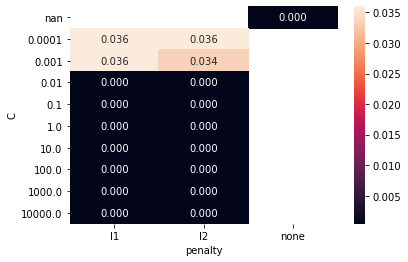

In [186]:
results14 = pd.DataFrame( best_model14.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results14['score_f1_micro'] = 1 - best_model14.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols14 = results14.columns.to_series().str.split('__').apply(lambda x: x[-1])
results14.columns = cols14

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results14.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results14

In [261]:
#assigning result
f1micro_14 = ("c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0004")

#### Trial 15

In [188]:
#Defining X and Y
X_ai = ai_df.iloc[:, 0:13]
Y_ai = ai_df.loc[:, "Machine failure"]
X_train, X_test, Y_train, Y_test = train_test_split( X_ai, Y_ai, train_size=5000, shuffle=True, random_state = 15)

In [189]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model15 = clf.fit(X_train, Y_train)

Wall time: 57.5 s


In [190]:
best_model15.cv_results_

{'mean_fit_time': array([0.0061903 , 0.02054501, 0.00857673, 0.0241354 , 0.0410944 ,
        0.05724711, 0.17002683, 0.14293413, 0.31176581, 0.40093737,
        1.22447939, 0.8166132 , 1.27624111, 0.97248235, 1.31265807,
        0.99904985, 1.37882819, 0.99707742, 0.01176825, 0.01117034,
        0.01356363, 0.01615644, 0.01655569, 0.01655569, 0.01775227,
        0.04627576, 0.02276874, 0.02028041, 1.01891775]),
 'std_fit_time': array([0.00039563, 0.00299869, 0.0014928 , 0.00171589, 0.00354259,
        0.00324789, 0.01658897, 0.0145411 , 0.05312869, 0.05091346,
        0.28885401, 0.21084628, 0.17726342, 0.1525376 , 0.17491761,
        0.1441417 , 0.16633039, 0.11076669, 0.00182815, 0.00097715,
        0.00101717, 0.00193369, 0.00135276, 0.00101713, 0.00074663,
        0.01256158, 0.00449525, 0.0033999 , 0.13899714]),
 'mean_score_time': array([0.00358372, 0.00319133, 0.00339131, 0.00339108, 0.0035862 ,
        0.00378375, 0.00399384, 0.00339379, 0.00319676, 0.0031776 ,
        0.003395

In [191]:
best_model15.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [192]:
best_model15.cv_results_['params'][ np.argmin(best_model15.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [193]:
best_model15.cv_results_['params'][ np.argmin(best_model15.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [194]:
best_model15.cv_results_['params'][ np.argmin(best_model15.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0326
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0326
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0326
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0302
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0002
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0002
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0002
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0002
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0002
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0002


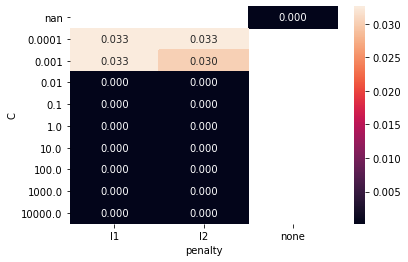

In [195]:
results15 = pd.DataFrame( best_model15.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results15['score_acc'] = 1 - best_model15.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols15 = results15.columns.to_series().str.split('__').apply(lambda x: x[-1])
results15.columns = cols15

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results15.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results15

In [262]:
#assigning result
acc_15 = ("c = 0.01, penalty = l1, solver = saga, acc = 0.0002")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.032600
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.032600
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.032600
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.030272
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.000206
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.000206
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.000206
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.000206
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.000206
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.000206


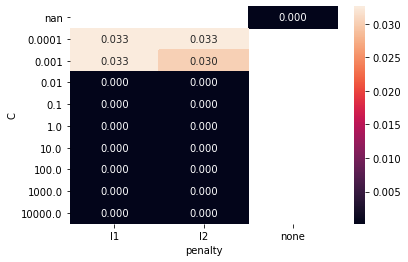

In [197]:
results15 = pd.DataFrame( best_model15.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results15['score_precision'] = 1 - best_model15.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols15 = results15.columns.to_series().str.split('__').apply(lambda x: x[-1])
results15.columns = cols15

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results15.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results15

In [263]:
#assigning result
precision_15 = ("c = 0.01, penalty = l1, solver = saga, precision = 0.000206")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0326
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0326
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0326
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0302
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0002
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0002
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0002
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0002
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0002
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0002


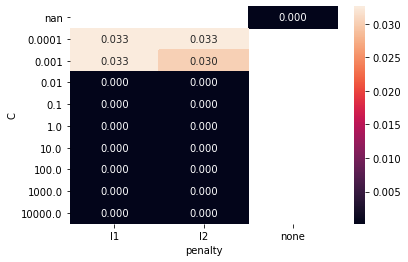

In [199]:
results15 = pd.DataFrame( best_model15.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results15['score_f1_micro'] = 1 - best_model15.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols15 = results15.columns.to_series().str.split('__').apply(lambda x: x[-1])
results15.columns = cols15

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results15.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results15

In [264]:
#assigning result
f1micro_15 = ("c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0002")

## Training Results

In [268]:
#adding results into a list
acc_List = [acc_1,acc_2,acc_3,acc_4,acc_5,acc_6,acc_7,acc_8,acc_9,acc_10,acc_11,acc_12,acc_13,acc_14,acc_15]
precision_List = [precision_1,precision_2,precision_3,precision_4,precision_5,precision_6,precision_7,precision_8,precision_9,precision_10,precision_11,precision_12,precision_13,precision_14,precision_15]
f1micro_List = [f1micro_1,f1micro_2,f1micro_3,f1micro_4,f1micro_5,f1micro_6,f1micro_7,f1micro_8,f1micro_9,f1micro_10,f1micro_11,f1micro_12,f1micro_13,f1micro_14,f1micro_15]

In [269]:
#creating dataframe of results
data = {'Acc': acc_List, 'Precision': precision_List, 'F1_micro':f1micro_List}

In [270]:
trainingResults  = pd.DataFrame(data = data)
pd.options.display.max_colwidth = 100
trainingResults

,Acc,Precision,F1_micro
0,"c = 0.01, penalty = l1, solver = saga, acc = 0.0010","c = 0.01, penalty = l1, solver = saga, precision = 0.001033","c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0010"
1,"c = 0.01, penalty = l1, solver = saga, acc = 0.0012","c = 0.01, penalty = l1, solver = saga, precision = 0.001242","c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0012"
2,"c = 0.01, penalty = l1, solver = saga, acc = 0.0010","c = 0.01, penalty = l1, solver = saga, precision = 0.001033","c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0010"
3,"c = 0.01, penalty = l1, solver = saga, acc = 0.0008","c = 0.01, penalty = l1, solver = saga, acc = 0.000827","c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0008"
4,"c = 0.01, penalty = l1, solver = saga, acc = 0.0012","c = 0.01, penalty = l1, solver = saga, precision = 0.001234","c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0012"
5,"c = 0.01, penalty = l2, solver = saga, acc = 0.0010","c = 0.01, penalty = l2, solver = saga, precision = 0.001031","c = 0.01, penalty = l2, solver = saga, f1_micro = 0.0010"
6,"c = 0.01, penalty = l1, solver = saga, acc = 0.0006","c = 0.01, penalty = l1, solver = saga, precision = 0.000619","c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0006"
7,"c = 0.01, penalty = l1, solver = saga, acc = 0.0012","c = 0.01, penalty = l1, solver = saga, precision = 0.001241","c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0012"
8,"c = 0.01, penalty = l1, solver = saga, acc = 0.0008","c = 0.01, penalty = l1, solver = saga, precision = 0.000826","c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0008"
9,"c = 0.01, penalty = l1, solver = saga, acc = 0.0008","c = 0.01, penalty = l1, solver = saga, precision = 0.000828","c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0008"


## Testing Dataset

In [204]:
#Defining X and Y
X_ai = ai_df.iloc[:, 0:13]
Y_ai = ai_df.loc[:, "Machine failure"]
X_train, X_test, Y_train, Y_test = train_test_split( X_ai, Y_ai, train_size=5000, shuffle=True, random_state = 16)

In [205]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model16 = clf.fit(X_test, Y_test)

E:\anaconda_3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\anaconda_3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\anaconda_3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\anaconda_3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\anaconda_3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_i

Wall time: 2min 1s


In [206]:
best_model16.cv_results_

{'mean_fit_time': array([0.00658236, 0.01715426, 0.00678172, 0.01913815, 0.03277488,
        0.04548545, 0.11330152, 0.10080061, 0.30297327, 0.36231756,
        2.32782936, 1.44715347, 3.18566465, 2.35246749, 3.14468007,
        2.33923965, 3.41124411, 2.44190912, 0.01336412, 0.01077085,
        0.01775236, 0.01874967, 0.02094407, 0.01934786, 0.01874957,
        0.02655811, 0.02979407, 0.03517566, 2.38632154]),
 'std_fit_time': array([7.97855891e-04, 2.03437767e-03, 7.46263690e-04, 1.47804739e-03,
        1.93554372e-03, 4.01112989e-03, 1.50400210e-02, 9.12226880e-03,
        9.26631863e-02, 4.96256408e-02, 2.39886808e-01, 1.43399654e-01,
        8.58513729e-01, 7.11749885e-01, 8.79345873e-01, 6.12951732e-01,
        9.32838649e-01, 5.91420302e-01, 1.19672618e-03, 1.71598906e-03,
        9.63678225e-03, 6.22515122e-03, 5.20183638e-03, 3.60147803e-03,
        1.16308833e-03, 2.24924204e-03, 3.86058096e-03, 1.34586879e-02,
        6.61431037e-01]),
 'mean_score_time': array([0.00319157, 

In [207]:
best_model16.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 26, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [208]:
best_model16.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [209]:
best_model16.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [210]:
best_model16.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0356
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0356
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0356
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0328
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0006
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0006
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0006
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0006
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0006
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0006


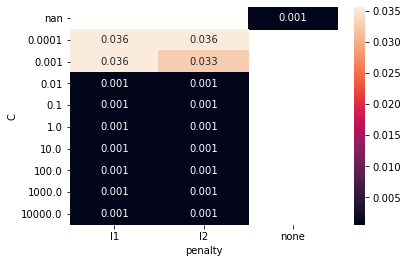

In [211]:
results16 = pd.DataFrame( best_model16.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results16['score_acc'] = 1 - best_model16.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols16 = results16.columns.to_series().str.split('__').apply(lambda x: x[-1])
results16.columns = cols16

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results16.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results16

In [265]:
#assigning result
acc_16 = ("c = 0.01, penalty = l1, solver = saga, acc = 0.0006")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.035600
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.035600
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.035600
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.032891
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.000621
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.000621
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.000621
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.000621
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.000621
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.000621


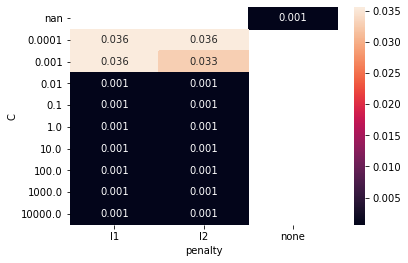

In [213]:
results16 = pd.DataFrame( best_model16.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results16['score_precision'] = 1 - best_model16.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols16 = results16.columns.to_series().str.split('__').apply(lambda x: x[-1])
results16.columns = cols16

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results16.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results16

In [266]:
#assigning result
precision_16 = ("c = 0.01, penalty = l1, solver = saga, precision = 0.000621")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.0356
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.0356
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.0356
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.0328
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.0006
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.0006
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.0006
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.0006
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.0006
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.0006


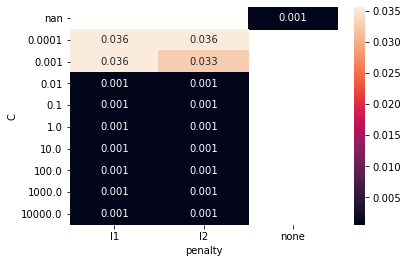

In [215]:
results16 = pd.DataFrame( best_model16.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results16['score_f1_micro'] = 1 - best_model16.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols16 = results16.columns.to_series().str.split('__').apply(lambda x: x[-1])
results16.columns = cols16

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results16.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results16

In [267]:
#assigning result
f1micro_16 = ("c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0006")

## Testing Results

In [271]:
#adding results into a list
test_acc = [acc_16]
test_precision = [precision_16]
test_f1micro = [f1micro_16]

In [272]:
#creating dataframe of results
data = {'Acc': test_acc, 'Precision': test_precision, 'F1_micro': test_f1micro}

In [273]:
trainingResults  = pd.DataFrame(data = data)
pd.options.display.max_colwidth = 100
trainingResults

,Acc,Precision,F1_micro
0,"c = 0.01, penalty = l1, solver = saga, acc = 0.0006","c = 0.01, penalty = l1, solver = saga, precision = 0.000621","c = 0.01, penalty = l1, solver = saga, f1_micro = 0.0006"
